# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "../datasets/car/imports-85-standarize.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, na_values= ['?'])
features = df.columns

print("Non estandarized data")
df.head()

Non estandarized data


,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,1.743470,0.000000,-1.948256,0.328798,-0.469295,1.120713,-3.050975,1.213330,-0.121867,...,-0.147475,0.074449,0.869568,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059
1,1,1.743470,0.000000,-1.948256,0.328798,-0.469295,1.120713,-3.050975,1.213330,-0.121867,...,-0.147475,0.074449,0.869568,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059
2,2,0.133509,0.000000,-1.948256,0.328798,-0.469295,1.120713,-0.717207,1.213330,-0.121867,...,1.112210,0.604046,0.869568,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627
3,3,0.938490,1.328961,-1.788499,0.328798,-0.469295,-0.826289,0.449677,-0.589081,-0.121867,...,-0.147475,-0.431076,0.869568,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354
4,4,0.938490,1.328961,-1.788499,0.328798,-0.469295,-0.826289,0.449677,-2.391492,-0.121867,...,-1.407161,0.218885,0.869568,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900


# Standarization

In [3]:
def PCA(X, n_components):
    # normalize to zero mean
    mu = X.mean(axis=0)
    X = X - mu
    
    # eigenvectors of covariance matrix
    sigma = X.T @ X
    eigvals, eigvecs = np.linalg.eig(sigma)
    
    # principal components
    order = np.argsort(eigvals)[::-1]
    components = eigvecs[:, order[:n_components]]
    
    # projection
    Z = X @ components
    
    # result
    return Z, components, eigvals[order]

In [4]:
X_train = df.as_matrix()[:190, 1:-1]
Y_train = df.as_matrix()[:190, -1]
X_test = df.as_matrix()[190:, 1:-1]
Y_test = df.as_matrix()[190:, -1]

In [5]:
Z, components, eigvals = PCA(X_train, 2)

In [6]:
eigvals[:10].sum()/np.sum(eigvals)

0.8696844168330821

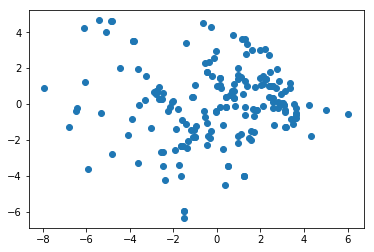

In [7]:
plt.scatter(Z[:,0],Z[:,1])
plt.show()

# Prediction

## Scikit - learn

In [8]:
X_train_ = np.append(np.ones((X_train.shape[0], 1)), X_train, axis=1)
Y_train_ = Y_train.reshape((Y_train.shape[0], 1))
theta = np.ones((X_train_.shape[1], 1))
lr = 0.003

In [9]:
X_train_.shape, Y_train_.shape, theta.shape

((190, 25), (190, 1), (25, 1))

In [12]:
X_test_ = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)
Y_test_ = Y_test.reshape((Y_test.shape[0], 1))

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_,Y_train_)

# Make predictions using the testing set
y_pred = regr.predict(X_test_)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test_, y_pred))
print("Mean squared error mine: %.2f"
      % mean_squared_error_mine(Y_test_, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test_, y_pred))

Coefficients: 
 [[ 0.00000000e+00  4.50109699e-02  3.55091684e-02  1.63804605e-03
  -2.21765191e-01 -1.31882043e-01 -5.48801746e-02  2.44158732e-04
   3.68958559e-03  1.41239243e-02 -5.64805720e-02  6.29752299e-02
  -8.12255601e-03 -3.48272725e-03 -1.44115097e-01  3.08071118e-03
  -2.52019913e-02 -1.99925300e-01 -1.04012211e-02 -1.77133779e-02
   4.31681670e-02 -1.62444372e-01  2.84000803e-01 -7.75435780e-02
   9.30897702e-01]]
Mean squared error: 0.06
Mean squared error mine: 0.03
Variance score: 0.81


## Mine

In [15]:
def linearRegression(X, theta):
    return np.dot(X, theta)

In [10]:
def mean_squared_error_mine(Y, Y_pred):
    return (1/(2*Y.shape[0]))*((Y_pred-Y)**2).sum()

In [16]:
def gradient(X, theta, Y, lr):
    h = linearRegression(X, theta)
    derivative = X.T@(h - Y)
    theta = theta - lr * derivative * 1/X.shape[0]
    return theta

In [35]:
for i in range(10000):
    Y_pred = linearRegression(X_train_, theta)
    #print("Error: {}".format(mean_squared_error(Y, Y_pred)))
    theta = gradient(X_train_, theta, Y_train_, lr)

print("Final Error: {}".format(mean_squared_error(Y_train_, Y_pred)))

Final Error: 0.0344749028749573


In [36]:
# Make predictions using the testing set
y_pred_mine = linearRegression(X_test_, theta)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test_, y_pred_mine))
print("Mean squared error mine: %.2f"
      % mean_squared_error_mine(Y_test_, y_pred_mine))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Mean squared error: 0.05
Mean squared error mine: 0.02
Variance score: 0.81


In [37]:
y_pred-y_pred_mine

array([[ 0.01176171],
       [ 0.00929098],
       [-0.06560625],
       [-0.00737727],
       [-0.04906138],
       [-0.04307909],
       [-0.04757882],
       [-0.04113139],
       [ 0.01974978],
       [ 0.02604216],
       [-0.0436473 ],
       [-0.04745284],
       [ 0.01990542],
       [-0.05671909],
       [-0.12452621]])